In [43]:
# Import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import yfinance as yf
import pandas_datareader as pdr

import datetime as dt

from arch import arch_model
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
import seaborn as sns

float64
object


<Axes: >

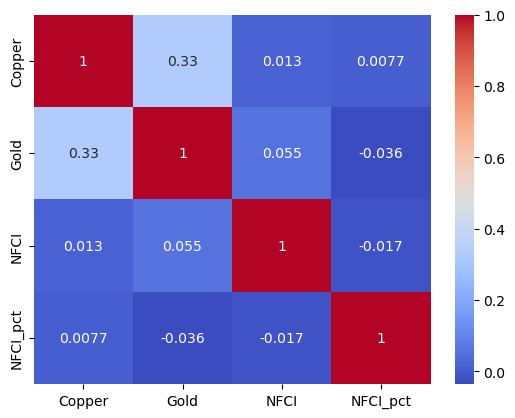

In [95]:
# Initialize dates
end = dt.datetime.now()
timedelta = dt.timedelta(20 * 365)
start = end - timedelta

# Download and clean datasets
df_cop = pd.read_csv(r"C:\Users\adevr\ra_forecaster\Historical\Copper Futures Historical Data.csv")
df_nfci = pdr.DataReader('NFCI', 'fred', start, end)
df_gld = pd.read_csv(r"C:\Users\adevr\ra_forecaster\Historical\Gold Futures Historical Data.csv")

for df in [df_cop, df_gld]:
    df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")
    print(df["Price"].dtype)
    if df["Price"].dtype not in [int, float]:
        df["Price"] = df["Price"].str.replace(",", "").astype(float)
    df.set_index("Date", inplace=True)
    # print(df)
    
df_cop = df_cop["Price"].sort_index(axis=0, ascending=True)
df_cop.name = "Copper"
# print(df_cop)

df_gld = df_gld["Price"].sort_index(axis=0, ascending=True)
df_gld.name = "Gold"
# print(df_gld)

df = pd.merge(df_cop, df_gld, left_index=True, right_index=True, how="inner")

# Assign return arrays
df["Gold"] = df["Gold"].pct_change()
df["Copper"] = df["Copper"].pct_change()

df = pd.merge(df, df_nfci, left_index=True, right_index=True, how="inner")
df["NFCI_pct"] = df["NFCI"].pct_change()

df = df.dropna()

sns.heatmap(df.corr(), cmap="coolwarm", annot=True)

mean_gold = 0.0008250000386890795
std_gold = 0.011374987340744004


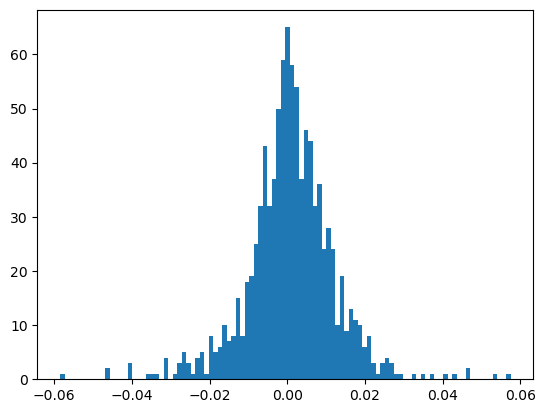

In [100]:
plt.hist(df["Gold"], bins=100);
print("mean_gold =", df["Gold"].mean())
print("std_gold =", df["Gold"].std())



mean_cop = 0.0017796395464819861
std_cop = 0.017490764400272387


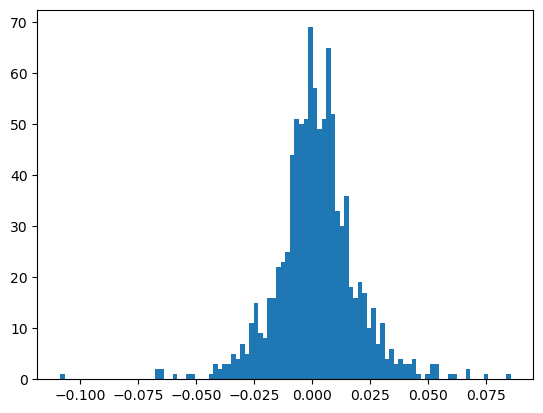

In [99]:
plt.hist(df["Copper"], bins=100);
print("mean_cop =", df["Copper"].mean())
print("std_cop =", df["Copper"].std())